# Exercise with Natural Language Processing

For todays exersice we will be doing two things.  The first is to build the same model with the same data that we did in the lecture, the second will be to build a new model with new data. 

## PART 1: 
- 20 Newsgroups Corpus


## PART 2:
- Republican vs Democrat Tweet Classifier

In [32]:
# # Import pandas for data handling
# import pandas as pd

# # NLTK is our Natural-Language-Took-Kit
# import ntlk
# from nltk.corpus import stopwords
# from nltk import word_tokenize
# from nltk.stem import PorterStemmer 
# from nltk.stem import WordNetLemmatizer 
# from nltk.corpus import wordnet 

# # Libraries for helping us with strings
# import string
# # Regular Expression Library
# import re

# # Import our text vectorizers
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidVectorizer 

# # Import our classifiers
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.ensemble import RandomForestClassifier 

# # Import some ML helper function
# from sklearn.model_selection import train_test_split 
# from sklearn.metrics import plot_confusion_matrix
# from sklearn.metrics import classification_report 

# # Import our metrics to evaluate our model
# from sklearn import metrics
# from sklearn.metrics import classification_report

# from sklearn import metrics

# # Library for plotting
# import matplotlib.pyplot as plt
# import seaborn as sns

# # You may need to download these from nltk
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
# stopwords = stopwords.words('english')

# Import pandas for data handling
import pandas as pd

# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# Import some ML helper function
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report



# Import our metrics to evaluate our model
from sklearn import metrics


# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = stopwords.words('english')

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shenaltissera/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shenaltissera/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shenaltissera/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Load and display data.
1. Load the 20-newsgroups.csv data into a dataframe.
1. Print the shape
1. Inspect / remove nulls and duplicates
1. Find class balances, print out how many of each topic_category there are.

In [4]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
df = pd.read_csv('data/20-newsgroups.csv')
# 2. Print the shape
print(df.shape)
df.head()

(11314, 4)


id                                            message  topic  \
0   0  From: lerxst@wam.umd.edu (where's my thing)\r\...      7   
1   1  From: guykuo@carson.u.washington.edu (Guy Kuo)...      4   
2   2  From: twillis@ec.ecn.purdue.edu (Thomas E Will...      4   
3   3  From: jgreen@amber (Joe Green)\r\nSubject: Re:...      1   
4   4  From: jcm@head-cfa.harvard.edu (Jonathan McDow...     14   

          topic_category  
0              rec.autos  
1  comp.sys.mac.hardware  
2  comp.sys.mac.hardware  
3          comp.graphics  
4              sci.space

In [6]:
# 3. Inspect / remove nulls and duplicates 
print(df.isnull().sum())     # No nulls in the dataset
print(df.duplicated().sum()) # No duplicates in the dataset

id                0
message           0
topic             0
topic_category    0
dtype: int64
0


In [7]:
# 4. Find class balances, print out how many of each topic_category there are.
df.topic_category.value_counts()

rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
rec.autos                   594
sci.med                     594
sci.space                   593
comp.windows.x              593
sci.electronics             591
comp.os.ms-windows.misc     591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: topic_category, dtype: int64

# Text Pre-Processing 
(aka Feature engineering)
1. Make a function that makes all text lowercase.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
2. Make a function that removes all punctuation. 
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
3. Make a function that removes all stopwords.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
4. EXTRA CREDIT (This step only): Make a function that stemms all words. 


5. Mandatory: Make a pipeline function that applys all the text processing functions you just built.
    * Do a sanity check by feeding in a test sentence into the pipeline. 
    
    
    
6. Mandatory: Use `df['message_clean'] = df[column].apply(???)` and apply the text pipeline to your text data column. 

In [8]:
# 1. Make a function that makes all text lowercase.

def make_lowercase(s):
    return s.lower()

test_string = 'This is A SENTENCE with LOTS OF CAPS.'
test_string = make_lowercase(test_string)
test_string

'this is a sentence with lots of caps.'

In [9]:
# 2. Make a function that removes all punctuation. 

def remove_punctuation(s):
    s = re.sub(r'[^\w\s]','',s)
    return s

test_string = 'This is a sentence! 50 With lots of punctuation??? & other #things.'
test_string = remove_punctuation(test_string)
test_string

'This is a sentence 50 With lots of punctuation  other things'

In [11]:
# 3. Make a function that removes all stopwords.

def remove_stopwords(s):
    # Turn sentence into a list of words
    words = word_tokenize(s)
    
    # Create a list where valid words will be added into
    valid_words = []
    
    # Loop through each word 
    for word in words:
        # Check if the word isn't in stopwords
        if word not in stopwords:
            # If the words isn't in stopwords, append to the valid_words list
            valid_words.append(word)
            
    # Join the list of valid words into one string
    s = ' '.join(valid_words)
    
    return s

test_string = 'This is a sentence! With some different stopwords i have added in here.'
test_string = remove_stopwords(test_string)
test_string

'This sentence ! With different stopwords added .'

In [12]:
# 4. EXTRA CREDIT: Make a function that stemms all words. 

def stem_words(s):
    # Init Stemmer
    stemmer = PorterStemmer()
    
    # Turn the sentence into a list of words 
    words = word_tokenize(s)
    
    # Create a list where valid words will be added into
    valid_words = []
    
    # Loop through all the words
    for word in words:
        # Stem the word
        stemmed_word = stemmer.stem(word)
        
        # Add the stemmed word to the valid words list 
        valid_words.append(stemmed_word)
        
    # Join valid words into one string
    s = ' '.join(valid_words)
    
    return s

test_string = 'I played and started playing with players and we all love to play with plays'
test_string = stem_words(test_string)
test_string

'I play and start play with player and we all love to play with play'

In [13]:
# 5. MANDATORY: Make a pipeline function that applys all the text processing functions you just built.

def text_pipeline(s):
    s = make_lowercase(s)
    s = remove_punctuation(s)
    s = stem_words(s)
    s = remove_stopwords(s)
    return s

test_string = 'I played and started playing with players and we all love to play with plays'
test_string = text_pipeline(test_string)
test_string

'play start play player love play play'

In [15]:
# 6. Mandatory: Use `df[column].apply(???)` and apply the text pipeline to your text data column. 
df['message_cleaned'] = df['message'].apply(text_pipeline)

print("ORIGINAL MESSAGE: ", df['message'][1])
print("CLEANED MESSAGE: ", df['message_cleaned'][1])

ORIGINAL MESSAGE:  From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Posting-Host: carson.u.washington.edu

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.

Guy Kuo <guykuo@u.washington.edu>

CLEANED MESSAGE:  guykuocarsonuwashingtonedu guy kuo subject si clock poll final call summari final call si clock report k

# Text Vectorization

1. Define your `X` and `y` data. 


2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
    * Do you want to use n-grams..?


3. Fit your vectorizer using your X data.
    * Remember, this process happens IN PLACE.


4. Transform your X data using your fitted vectorizer. 
    * `X = vectorizer.???`



5. Print the shape of your X.  How many features (aka columns) do you have?

In [16]:
# 1. Define your `X` and `y` data. 
X = df['message_cleaned'].values

y = df['topic_category'].values

array(['rec.autos', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', ...,
       'comp.sys.ibm.pc.hardware', 'comp.graphics', 'rec.motorcycles'],
      dtype=object)

In [21]:
# 2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).

vectorizer = TfidfVectorizer()

In [22]:
# 3. Fit your vectorizer using your X data

vectorizer.fit(X)

AttributeError: lower not found

In [23]:
# 4. Transform your X data using your fitted vectorizer. 

X = vectorizer.transform(X)

NotFittedError: Vocabulary not fitted or provided

In [24]:
# 5. Print the shape of your X.  How many features (aka columns) do you have?

print(X.shape)
# 119,654 columns

(11314, 119652) <class 'scipy.sparse.csr.csr_matrix'>


# Split your data into Training and Testing data. 

In [25]:
# Split our data into testing and training like always. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

___
# Build and Train Model
Use Multinomial Naive Bayes to classify these documents. 

1. Initalize an empty model. 
2. Fit the model with our training data.


Experiment with different alphas.  Use the alpha gives you the best result.

EXTRA CREDIT:  Use grid search to programmatically do this for you. 

In [26]:
# 1. Initalize an empty model. 

model = MultinomialNB(alpha=.15)

In [27]:
# Fit our model with our training data.

model.fit(X_train, y_train)

MultinomialNB(alpha=0.05)

# Evaluate the model.

1. Make new predicitions using our test data. 
2. Print the accuracy of the model. 
3. Print the confusion matrix of our predictions. 
4. Using `classification_report` print the evaluation results for all the classes. 



In [29]:
# 1. Make new predictions of our testing data. 
y_pred = model.predict(X_test)

# Make predicted probabilities of testing data
y_pred_proba = model.predict_proba(X_test)

In [30]:
# 2. Print the accuracy of the model. 
accuracy = model.score(X_test, y_test)

print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.914715


In [31]:
# 3. Plot the confusion matrix of our predictions

fig, ax = plt.subplots(figsize=(13,8))

disp = plot_confusion_matrix(model, X_test, y_test,
                            display_labels=model.classes_,
                            cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
disp

In [33]:
# 4. Using `classification_report` print the evaluation results for all the classes. 

print(classification_report(y_test, y_pred, target_names=model.classes_))

                          precision    recall  f1-score   support

             alt.atheism       0.93      0.94      0.93        97
           comp.graphics       0.83      0.85      0.84       104
 comp.os.ms-windows.misc       0.91      0.82      0.86       115
comp.sys.ibm.pc.hardware       0.72      0.86      0.79       123
   comp.sys.mac.hardware       0.94      0.90      0.92       126
          comp.windows.x       0.88      0.92      0.90       106
            misc.forsale       0.90      0.76      0.83       109
               rec.autos       0.94      0.94      0.94       139
         rec.motorcycles       0.95      0.97      0.96       122
      rec.sport.baseball       0.99      0.97      0.98       102
        rec.sport.hockey       0.96      0.98      0.97       108
               sci.crypt       0.98      0.98      0.98       125
         sci.electronics       0.87      0.88      0.87       114
                 sci.med       0.97      0.97      0.97       119
         

# Manual predicition
Write a new sentence that you think will be classified as talk.politics.guns. 
1. Apply the text pipeline to your sentence
2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`
    * Note, the `transform` function accepts a list and not a individual string.
3. Use the model to predict your new `X`. 
4. Print the prediction

In [40]:
my_sentence = 'I went to the range to use a Glock. I did not leave a single bullet in the chamber. I like the sound of reloading a pistol'

# 1. Apply the text pipeline to your sentence

my_sentence = text_pipeline(my_sentence)
print(my_sentence)   # Sanity check

# 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`\

X = vectorizer.transform([my_sentence])

# 3. Use the model to predict your new `X`. 

prediction = model.predict(X)

# 4. Print the prediction

print(prediction)

went rang use glock leav singl bullet chamber like sound reload pistol


NotFittedError: Vocabulary not fitted or provided

___
# PART 2: Twitter Data
This part of the exercise is un-guided on purpose.  

Using the `dem-vs-rep-tweets.csv` build a classifier to determine if a tweet was written by a democrat or republican. 

Can you get an f1-score higher than %82

In [41]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
df = pd.read_csv('data/dem-vs-rep-tweets.csv')

# 2. Print the shape
print(df.shape)
df.head()

(86460, 3)


Party         Handle                                              Tweet
0  Democrat  RepDarrenSoto  Today, Senate Dems vote to #SaveTheInternet. P...
1  Democrat  RepDarrenSoto  RT @WinterHavenSun: Winter Haven resident / Al...
2  Democrat  RepDarrenSoto  RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3  Democrat  RepDarrenSoto  RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4  Democrat  RepDarrenSoto  RT @Vegalteno: Hurricane season starts on June...

In [43]:
# 3. Inspect / remove nulls and duplicates
print(df.isnull().sum())
print(df.duplicated().sum())
df = df.drop_duplicates()
print(df.duplicated().sum())

Party     0
Handle    0
Tweet     0
dtype: int64
57
0


In [45]:
# 4. Apply the text pipeline to our tweets column
df['Tweet_cleaned'] = df['Tweet'].apply(text_pipeline)

print("ORIGINAL TWEET: ", df['Tweet'][0])
print("CLEANED TWEET: ", df['Tweet_cleaned'][0])

ORIGINAL TWEET:  Today, Senate Dems vote to #SaveTheInternet. Proud to support similar #NetNeutrality legislation here in the Houseâ€¦ https://t.co/n3tggDLU1L
CLEANED TWEET:  today senat dem vote savetheinternet proud support similar netneutr legisl hous httpstcon3tggdlu1l


In [ ]:
####################################TEXT VECTORIZATION########################################

In [47]:
# 5. Define your `X` and `y` data. 
X = df['Tweet_cleaned'].values

y = df['Party'].values

# 6. Initialize a vectorizer 

vectorizer = TfidfVectorizer()

# 7. Fit the vectorizer

vectorizer.fit(X)

# 8. Transform your X data using your fitted vectorizer. 

X = vectorizer.transform(X)

# 9. Print the shape of your X. 

print(X.shape)

(86403, 121081)


In [48]:
# 10. Split data into testing and training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
###################################BUILD AND TRAIN MODEL######################################

In [70]:
# 11. Initalize an empty model. 

model = MultinomialNB(alpha=.15)

# 12. Fit our model with our training data.

model.fit(X_train, y_train)

MultinomialNB(alpha=0.15)

In [71]:
##################################EVALUATE THE MODEL##########################################

In [72]:
# 13. Make new predictions of our testing data. 
y_pred = model.predict(X_test)

# 14. Print the accuracy of the model. 
accuracy = model.score(X_test, y_test)
print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.816330


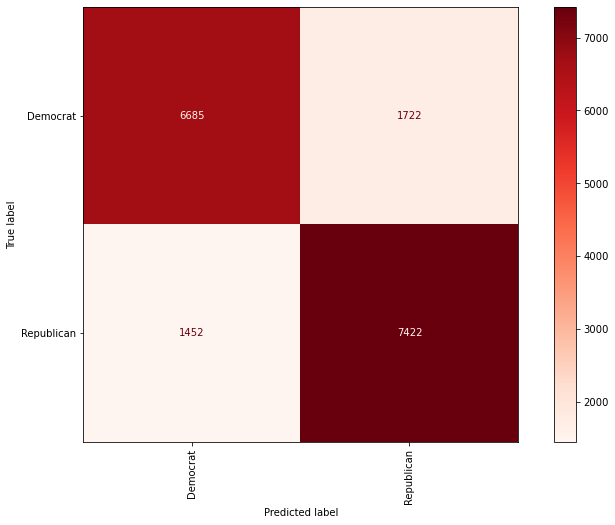

In [73]:
###################################MANUAL PREDICTION##########################################

In [77]:
# Random sentence
new_text = 'I hate poor people. I like war and I like killing brown people in the Middle East. Unions suck, please trust the corporations they only have your best interest in mind'

new_text = text_pipeline(new_text)

print(new_text)

new_text_vectorized = vectorizer.transform([new_text])

model.predict(new_text_vectorized)

hate poor peopl like war like kill brown peopl middl east union suck pleas trust corpor onli best interest mind


array(['Democrat'], dtype='<U10')

In [79]:
# This is a tweet from Republican Matt Gaetz
new_text = 'The media protects Democrats and seeks to attack Republicans. But when it comes to Trump Republicans, and certainly Trump himself, the left levels the punishment before the facts are even known.'

new_text = text_pipeline(new_text)

print(new_text)

new_text_vectorized = vectorizer.transform([new_text])

model.predict(new_text_vectorized)

media protect democrat seek attack republican come trump republican certainli trump left level punish befor fact even known


array(['Democrat'], dtype='<U10')